In [1]:
import torch
from IPython.display import Image, display
import glob, os,shutil
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'yolov5s', autoshape=False, pretrained=False)

In [ ]:
model

In [ ]:
type(model)

In [ ]:
model.model[0]

In [ ]:
results = model('https://ddot.dc.gov/sites/default/files/dc/sites/ddot/page_content/images/1_5_Pedestrian.jpg', )

In [3]:
labels_list=glob.glob("../datasets/bdd100k/labels/train5"+"/"+"*.txt")
images_list=glob.glob("../datasets/bdd100k/images/train"+"/"+"*.jpg")
print(len(labels_list))
print(len(images_list))

labels_list2=glob.glob("../datasets/bdd100k/labels/val5"+"/"+"*.txt")
images_list2=glob.glob("../datasets/bdd100k/images/val"+"/"+"*.jpg")
print(len(labels_list2))
print(len(images_list2))

10000
10000
5000
5000


In [4]:
img = cv2.imread("../datasets/bdd100k/images/val/bb2e43e4-5e7a7129.jpg")
img=cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


with open("../datasets/bdd100k/labels/val5/bb2e43e4-5e7a7129.txt", "rt") as f:
    data_lines = f.readlines()

bboxes=[]
w=1280
h=720
for item in range(len(data_lines)):
    cl=int(data_lines[item].split(" ")[0])
    a=float(data_lines[item].split(" ")[1])
    b=float(data_lines[item].split(" ")[2])
    c=float(data_lines[item].split(" ")[3])
    d=float(data_lines[item].split(" ")[4][:-1])
    
    x1 = int((a-c/2)*w)
    y1 = int((b-d/2)*h)
    x2 = int((a+c/2)*w)
    y2 = int((b+d/2)*h)
    
    bboxes.append([x1,y1,x2,y2,cl])
    
print(bboxes)


[[656, 250, 664, 266, 8], [567, 255, 574, 271, 8], [490, 266, 497, 280, 8], [629, 306, 635, 316, 8], [581, 305, 586, 316, 8], [859, 291, 881, 297, 9], [542, 345, 563, 365, 2], [568, 346, 606, 378, 2], [634, 345, 663, 370, 2], [691, 347, 727, 372, 2], [871, 342, 1002, 409, 2], [587, 340, 613, 368, 2], [622, 336, 650, 366, 3], [612, 348, 624, 360, 2], [664, 343, 682, 366, 2], [676, 345, 698, 368, 2], [498, 347, 522, 361, 2], [462, 344, 482, 359, 2], [439, 344, 466, 357, 2], [406, 344, 430, 358, 2], [369, 342, 388, 368, 2], [234, 334, 372, 383, 2], [169, 341, 301, 390, 2], [99, 338, 253, 405, 2], [0, 333, 199, 425, 2], [1093, 315, 1134, 384, 0], [1136, 311, 1169, 386, 0], [1197, 326, 1219, 377, 0], [482, 345, 508, 358, 2], [562, 347, 574, 360, 2], [874, 341, 899, 355, 2]]


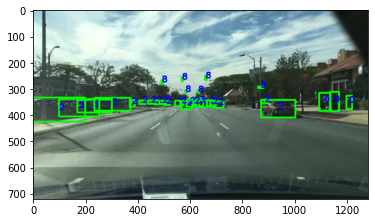

In [6]:
# for c in bboxes:
#     cv2.rectangle(img, (c[0],c[1]), (c[2], c[3]), (0, 255, 0), 5)
#     cv2.putText(img, str(c[4]), (int((c[0]+c[2])/2), int((c[1]+c[3])/2)), 0, 1, (0, 0, 255),3)
    
plt.imshow(img)
plt.show()

In [ ]:
!python train.py --img 640 --batch 32 --epochs 5 --data './data/bdd.yaml' --cfg ./models/yolov5l.yaml --weights "" --name yolov5l_bdd  --cache

train: weights=, cfg=./models/yolov5l.yaml, data=./data/bdd.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=5, batch_size=32, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=yolov5l_bdd, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
requirements: opencv-python>=4.1.1 not found and is required by YOLOv5, attempting auto-update...

requirements: tensorboard>=2.4.1 not found and is required by YOLOv5, attempting auto-update...

requirements: 2 packages updated per /Users/as665471/workspace-py/yolo5/yolov5/requirements.txt
requirements: ⚠️ Restart runtime or rerun co

 20                -1  3   2495488  models.common.C3                        [512, 512, 3, False]          
 21                -1  1   2360320  models.common.Conv                      [512, 512, 3, 2]              
 22          [-1, 10]  1         0  models.common.Concat                    [1]                           
 23                -1  3   9971712  models.common.C3                        [1024, 1024, 3, False]        
 24      [17, 20, 23]  1     80775  models.yolo.Detect                      [10, [[10, 13, 16, 30, 33, 23], [30, 61, 62, 45, 59, 119], [116, 90, 156, 198, 373, 326]], [256, 512, 1024]]
YOLOv5l summary: 468 layers, 46186759 parameters, 46186759 gradients

Scaled weight_decay = 0.0005
optimizer: SGD with parameter groups 101 weight (no decay), 104 weight, 104 bias
train: Scanning '/Users/as665471/workspace-py/yolo5/datasets/bdd100k/labels/trai
train: New cache created: /Users/as665471/workspace-py/yolo5/datasets/bdd100k/labels/train.cache
train: Caching images (6.9GB 